# Kalman filter for a simple linear system

### a) Minimal state vector
The equations governing the dynamics of the system are:

$x_t = x_{t-1} + \dot{x_{t-1}} \Delta t + \ddot{x_{t}} \Delta t^2 / 2$

$\dot{x}_t = \dot{x_{t-1}} + \ddot{x_{t}} \Delta t $

where $\Delta t = 1$

The state matrix is:


$X_t=\begin{bmatrix}x_t \\ \dot{x_t} \end{bmatrix}$

This is sufficient to model the system. Each successive step will depend on $X_{t-1}$ and the control. In the model, the control will be the randomly set $\ddot{x_t}$, as given in the question.

$u_t = \ddot{x_t}$



### b) Posterior of the prediction step

$p(x_t | u_t, x_{t-1}) = det(2\pi R_t)^{-1/2}exp\{-\frac{1}{2}(x_t - A_{t-1}[x_{t-1},\dot{x_{t-1}}]^T - B u_t)^T  R_{t-1}^{-1} (x_t - A_{t-1}X_{t-1} - B u_t)\}$

The mean and th covariance of the posterior will be given by:

$\overline{\mu_t} = A_t X_{t-1} + B_t u_t$

$\overline{\Sigma_t} = A_t \Sigma_{t-1}A_t^T+R_t$

To satisfy the governing equations, the other matrices are:


$A_t = \begin{bmatrix}1 & 1 \\ 0 & 1 \end{bmatrix}$

$B_t = \begin{bmatrix}0.5 \\ 1 \end{bmatrix}$

$\epsilon_t$ is a multivariate Gaussian $\mathcal{N}(\begin{bmatrix}0\\0\end{bmatrix},\,\sigma^{2}BB^T)\,$, where

$R_t = \sigma^2 B B^T = 1 \begin{bmatrix}0.5 \\ 1 \end{bmatrix} \begin{bmatrix}0.5 \\ 1 \end{bmatrix}^T =\begin{bmatrix}0.25 & 0.5 \\ 0.5 & 1 \end{bmatrix}$


### c) Implementation of the posterior estimation

In [2]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math

def Posterior(x_prior, sigma_prior, u_t):
    A = np.array([[1,1],[0,1]])
    B = np.array([0.5, 1])
    R = np.array([[0.25, 0.5],[0.5, 1]])
    mu_posterior = A.dot(x_prior) + B * u_t
    sigma_posterior = A.dot(sigma_prior).dot(np.transpose(A)) + R
    return mu_posterior, sigma_posterior

We are given at $t=0, x_0=\dot{x_0}=\ddot{x_0}=0$

mu= [0. 0.]
t= 1
cov= [[2.25 1.5 ]
 [1.5  2.  ]]


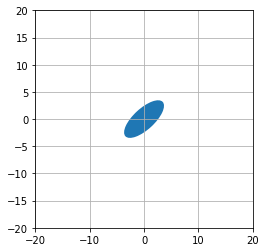

mu= [0. 0.]
t= 2
cov= [[7.5 4. ]
 [4.  3. ]]


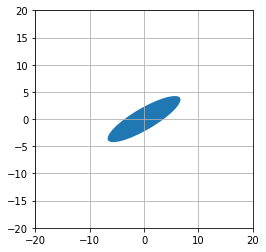

mu= [0. 0.]
t= 3
cov= [[18.75  7.5 ]
 [ 7.5   4.  ]]


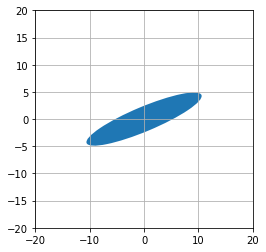

mu= [0. 0.]
t= 4
cov= [[38. 12.]
 [12.  5.]]


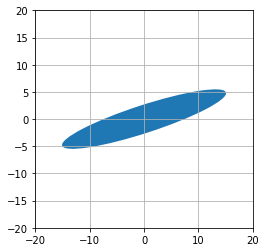

mu= [0. 0.]
t= 5
cov= [[67.25 17.5 ]
 [17.5   6.  ]]


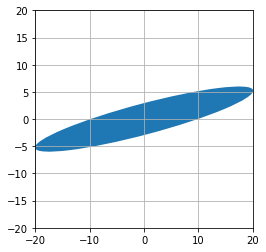

In [3]:
x_0 = np.array([0,0])
E_0 = np.array([[1, 0],[0, 1]])

endTime = 5

x_variances = []
x_dot_variances = []

def drawUncertaintyEllipse(eigenValues, eigenVectors):
    # See the end of the page for the explanation of ellipses.
    ellipseWidth = 2 * math.sqrt(eigenValues[0] * 5.991) # 5.991 is the scaling to use for a 1 sigma ellipse
    ellipseHeight = 2 * math.sqrt(eigenValues[1] * 5.991) # 5.991 is the scaling to use for a 1 sigma ellipse
    angle = math.atan(eigenVectors[1,0]/eigenVectors[0,0])
    angleDegree = angle*180/math.pi
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, aspect='equal')
    e1=Ellipse((0,0), ellipseWidth, ellipseHeight, angleDegree)
    ax.add_patch(e1)
    ax.set_xlim([-20,20])
    ax.set_ylim([-20,20])
    plt.grid(True)
    plt.show()

# now loop over the time steps
u_t = 0
for i in range(1, endTime + 1):
    [mu, covariance] = Posterior(x_0, E_0, u_t)
    x_0 = mu
    E_0 = covariance
    print("mu=", mu)
    print("t=",i)
    print("cov=", covariance)
    [eigenValues, eigenVectors] = LA.eig(covariance)
    x_variances.append(eigenValues[0])    
    x_dot_variances.append(eigenValues[1])

    #print("eigenvalues: ", eigenValues)
    #print("eigenvectors: ", eigenVectors)
    
    drawUncertaintyEllipse(eigenValues, eigenVectors)

## We can also plot the distribution of the posterior

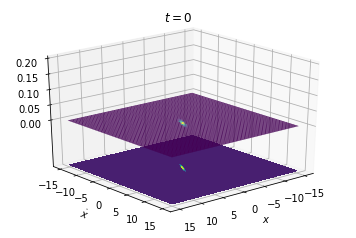

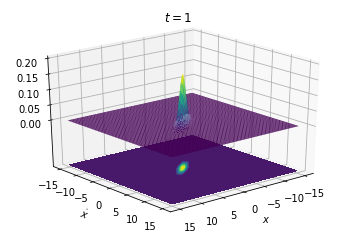

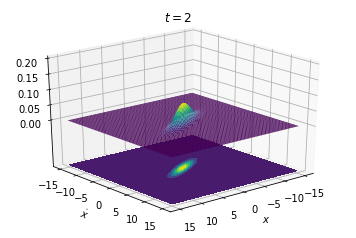

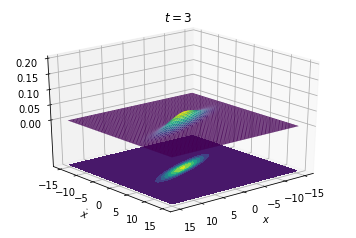

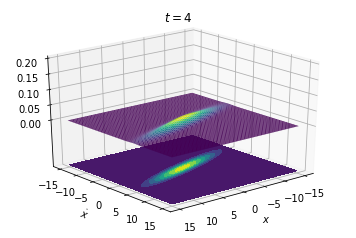

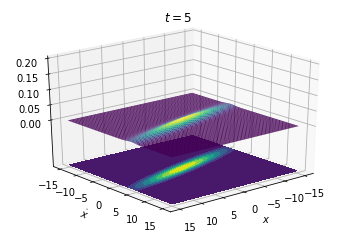

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

def ConstructGrid():
    N = 200
    X = np.linspace(-15., 15., N)
    Y = np.linspace(-15., 15., N)
    X, Y = np.meshgrid(X, Y)

    # Construct the grid
    grid = np.empty(X.shape + (2,))
    grid[:, :, 0] = X
    grid[:, :, 1] = Y
    
    return X, Y, grid

def plot(X, Y, Z, title):
    # Create a surface plot and projected filled contour plot under it.
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, 
                    antialiased=True,
                    cmap=cm.viridis)

    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

    # Adjust the limits, ticks and view angle
    ax.set_zlim(-0.15,0.2)
    ax.set_zticks(np.linspace(0,0.2,5))
    ax.view_init(25, 50)
        
    ax.set_xlabel("$x$")
    ax.set_ylabel("$\dot{x}$")
    ax.set_title(title)
    
    plt.show()
    
    u_t = 0

# Initial state
x_0 = np.array([0,0])
# add a small number to avoid singularity
E_0 = np.array([[0.00001, 0],[0., 0.00001]])

[X, Y, grid] = ConstructGrid()

for i in range(0, 6):
    [mu, covariance] = Posterior(x_0, E_0, u_t)
    x_0 = mu
    E_0 = covariance
    
    #Z = multivariate_gaussian(grid, x_0, E_0)
    Z = multivariate_normal.pdf(grid, x_0, E_0)
    title = "$t=" + str(i) + "$"
    plot(X,Y,Z, title)

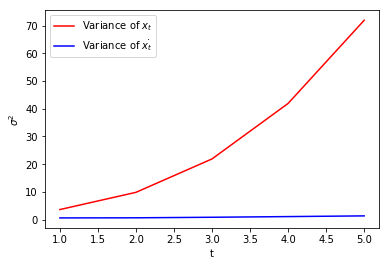

In [6]:
plt.plot(range(1, 6), x_variances, 'r-', label="Variance of $x_t$")
plt.plot(range(1, 6), x_dot_variances, 'b-', label="Variance of $\dot{x_t}$")
plt.xlabel("t")
plt.ylabel("$\sigma^2$")
plt.legend()
plt.show()

### Covariance between $x_t$ and $\dot{x_t}$

The covariance between the state variables will go to infinity as $t \rightarrow \infty$

## Uncertainty ellipses

Equation of an ellipse is given by:

$\big( \frac{x}{a} \big)^2 + \big( \frac{y}{b} \big)^2 = 1$, where a and b are the width and height of the ellipse.

We can replace a and b with $\sigma_x$ and $\sigma_y$.

$\big( \frac{x}{2\sigma_x} \big)^2 + \big( \frac{y}{2\sigma_y} \big)^2 = s$, where s is a scaling factor.

If we divide both sides by s and rearrange:

$\big( \frac{x}{2\sigma_x\sqrt{s^2}} \big)^2 + \big( \frac{y}{2\sigma_y\sqrt{s^2}} \big)^2 = 1$

If we want our ellipse to represent a specific confidence interval, we can choose s accordingly.

For $\sigma = 1$, $s$ becomes 5.991 (https://en.wikipedia.org/wiki/Chi-squared_distribution) 

Since, we calculated the variances through eigen analysis above, we need to take the sqrt of them.
